In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cancer_down =  pd.read_csv('../../data/processed/cancer_down_centralities.csv', sep=',')
cancer_up =  pd.read_csv('../../data/processed/cancer_up_centralities.csv', sep=',')
healthy_down = pd.read_csv('../../data/processed/healthy_down_centralities.csv', sep=',')
healthy_up = pd.read_csv('../../data/processed/healthy_up_centralities.csv', sep=',')

In [4]:
cancer_down = cancer_down[['shared name', 'Betweenness', 'Closeness', 'Eigenvector']]
cancer_up = cancer_up[['shared name', 'Betweenness', 'Closeness', 'Eigenvector']]

In [5]:
healthy_down = healthy_down[['shared name', 'Betweenness', 'Closeness', 'Eigenvector']]
healthy_up = healthy_up[['shared name', 'Betweenness', 'Closeness', 'Eigenvector']]

## Prostate cancer down regulated 3D scatter plot  

In [11]:
cancer_down.sort_values(by=['Betweenness', 'Closeness', 'Eigenvector'], ascending=False).reset_index(drop=True, inplace=True)
important = cancer_down.head(2)['shared name'].to_list()
important

['l-arginine', 'n-acetyl-l-glutamate 5-semialdehyde']

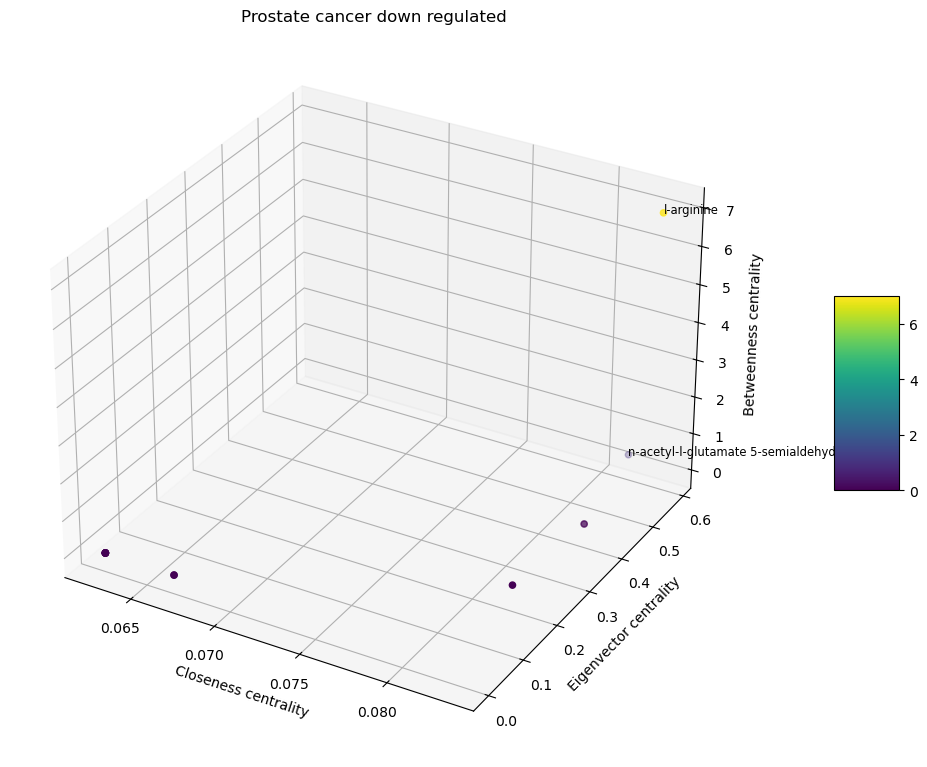

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(cancer_down['Closeness'], cancer_down['Eigenvector'], cancer_down['Betweenness'], c=cancer_down['Betweenness'], label=cancer_down['shared name'])
plt.title('Prostate cancer down regulated')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
for x, y, z, label in zip(cancer_down['Closeness'], cancer_down['Eigenvector'], cancer_down['Betweenness'], cancer_down['shared name']):
    if label in important:
        ax.text(x, y, z, label, fontsize='small', rotation=45)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_cancer_down.png', bbox_inches='tight')

## Prostate cancer up regulated 3D scatter plot  

In [13]:
cancer_up.sort_values(by=['Betweenness', 'Closeness', 'Eigenvector'], ascending=False).reset_index(drop=True, inplace=True)
important = cancer_up.head(5)['shared name'].to_list()
important

['4-acetamidobutanoate',
 'gamma-glutamylcysteine',
 'pyroglutamic acid',
 'quinate',
 'citrulline']

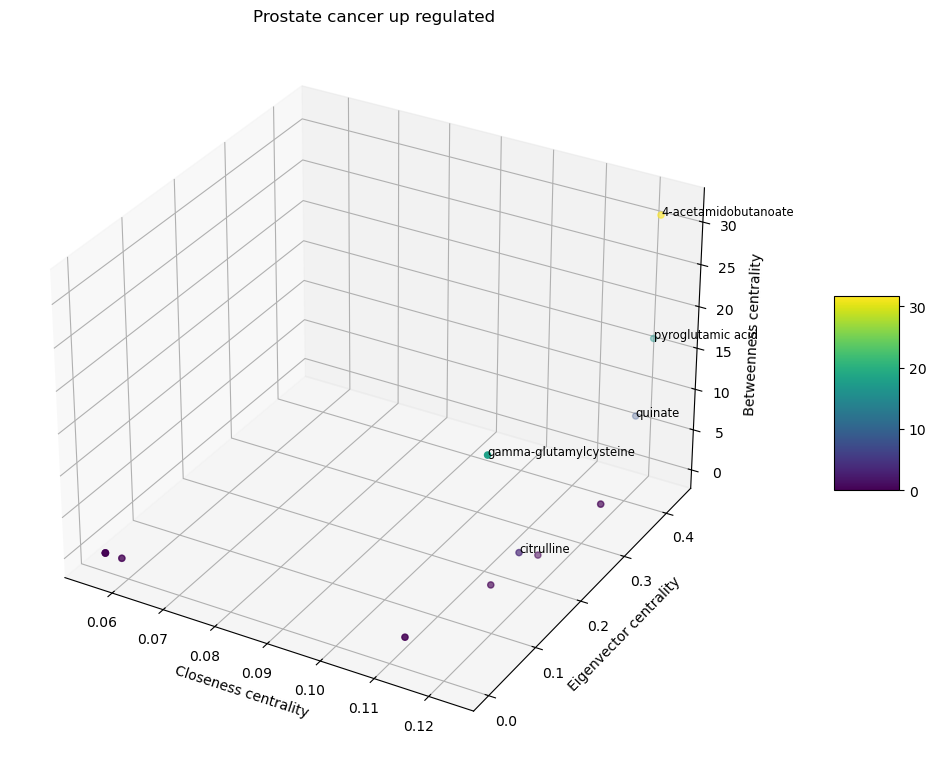

In [14]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(cancer_up['Closeness'], cancer_up['Eigenvector'], cancer_up['Betweenness'], c=cancer_up['Betweenness'], label=cancer_up['shared name'])
plt.title('Prostate cancer up regulated')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
for x, y, z, label in zip(cancer_up['Closeness'], cancer_up['Eigenvector'], cancer_up['Betweenness'], cancer_up['shared name']):
    if label in important:
        ax.text(x, y, z, label, fontsize='small', rotation=45)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_cancer_up.png', bbox_inches='tight')

## Healthy down regulated 3D scatter plot

In [28]:
healthy_down.sort_values(by=['Betweenness', 'Closeness', 'Eigenvector'], ascending=False).reset_index(drop=True, inplace=True)
important = healthy_down.head(3)['shared name'].to_list()
important

['l-arginine', '2-oxoarginine', 'diaminopimelic acid']

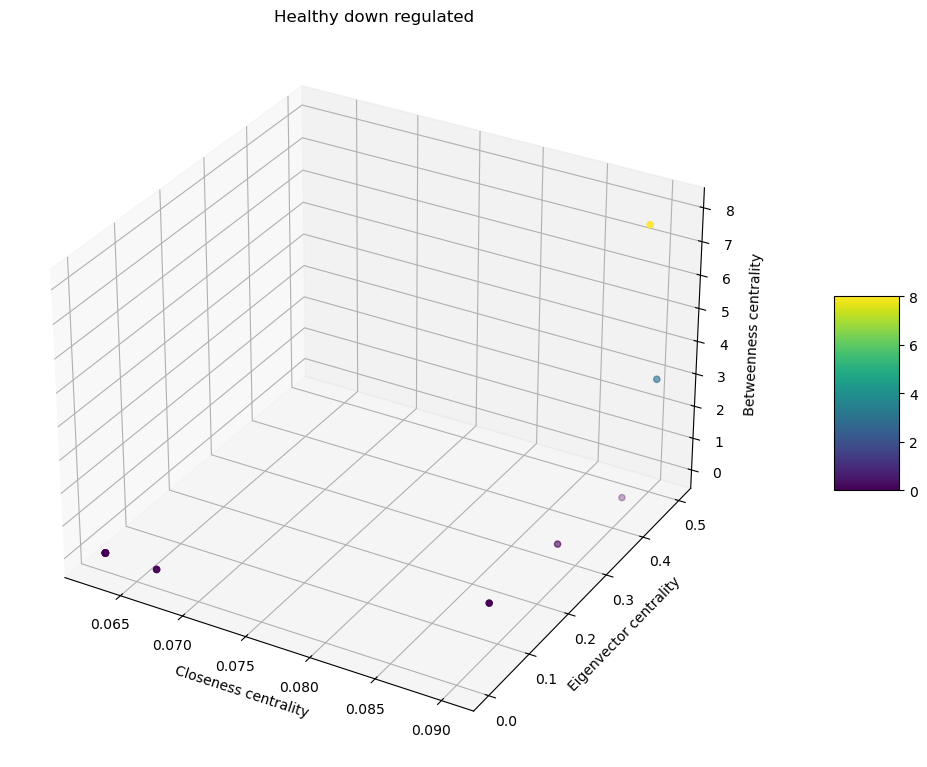

In [33]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(healthy_down['Closeness'], healthy_down['Eigenvector'], healthy_down['Betweenness'], c=healthy_down['Betweenness'], label=healthy_down['shared name'])
plt.title('Healthy down regulated')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
for x, y, z, label in zip(healthy_down['Closeness'], healthy_down['Eigenvector'], healthy_down['Betweenness'], healthy_down['shared name']):
    if label in important:
        if label not in ['4-acetamidobutanoate', 'l-arginine']:
            ax.text(x, y, z, label, fontsize='small', rotation=45)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_healthy_down.png', bbox_inches='tight')

## Healthy up regulated 3D scatter plot

In [31]:
healthy_up.sort_values(by=['Closeness', 'Eigenvector', 'Betweenness'], ascending=False).reset_index(drop=True, inplace=True)
important = healthy_up.head(3)['shared name'].to_list()
important

['putrescine', 'd-galactose', 'd-mannose']

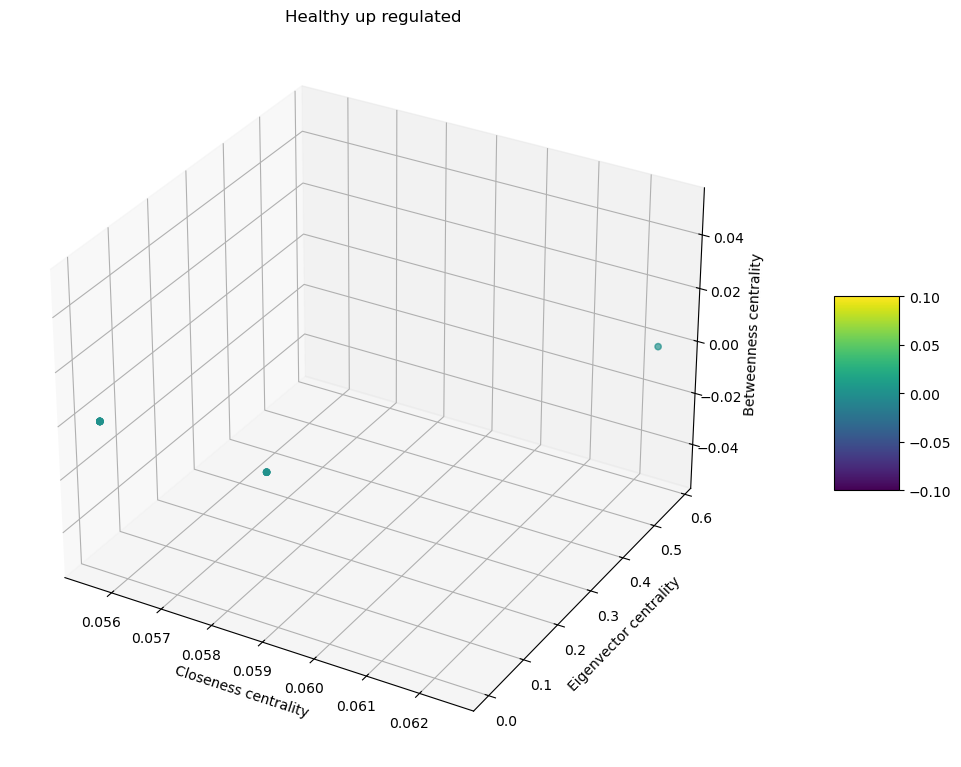

In [34]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(healthy_up['Closeness'], healthy_up['Eigenvector'], healthy_up['Betweenness'], c=healthy_up['Betweenness'], label=healthy_up['shared name'])
plt.title('Healthy up regulated')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_healthy_up.png', bbox_inches='tight')